In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [39]:
Salary = pd.read_csv('Kaggle_Salary.csv', low_memory = False)
Salary.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,NaN,NaN
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.0,"30,000-39,999"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14.0,">250,000"
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"


# Part 1: Data Cleaning & Data Exploration

In [40]:
# Drop the first row
Salary = Salary.loc[1:,]
Salary.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.0,"30,000-39,999"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14.0,">250,000"
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6.0,"60,000-69,999"


In [41]:
# Check missing values
Salary.isna().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
                                       ...  
Q34_Part_11                            11252
Q34_Part_12                            12210
Q34_OTHER_TEXT                             0
Q10_Encoded                                0
Q10_buckets                                0
Length: 248, dtype: int64

In [42]:
# Coding all NaN in multiple choice as 'No Answer'
col_name = Salary.columns.unique()

def recoding(df):
    for i in range(len(col_name)):
        if 'Part' in col_name[i]:
            df[col_name[i]] = df[col_name[i]].fillna('No Answer')
    return df  

Salary = recoding(Salary)
Salary.head()
    

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,-1,3.0,"30,000-39,999"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,-1,0.0,"0-9,999"
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,No Answer,No Answer,No Answer,Azure SQL Database,No Answer,No Answer,No Answer,-1,14.0,">250,000"
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,-1,0.0,"0-9,999"
5,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,No Answer,AWS Relational Database Service,No Answer,No Answer,No Answer,No Answer,No Answer,-1,6.0,"60,000-69,999"


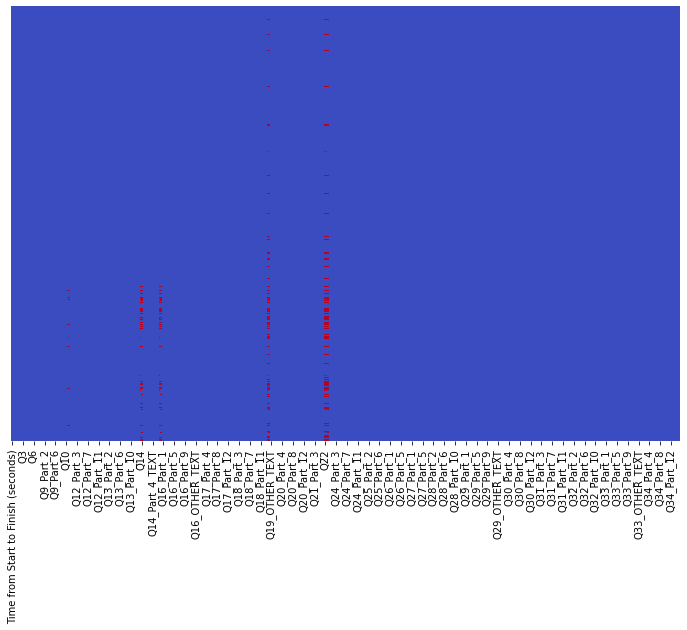

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Salary.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [44]:
Salary.isna().sum().sort_values()

Time from Start to Finish (seconds)       0
Q28_Part_3                                0
Q28_Part_4                                0
Q28_Part_5                                0
Q28_Part_6                                0
                                       ... 
Q14                                    1045
Q15                                    1075
Q19                                    1844
Q22                                    1947
Q23                                    1956
Length: 248, dtype: int64

## Q11 NAs
Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

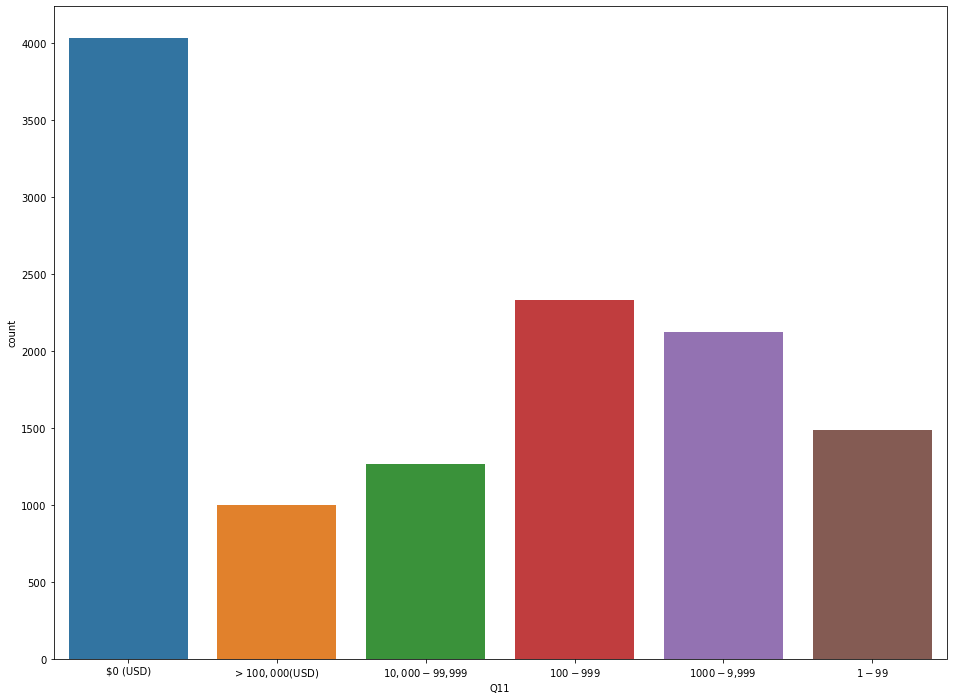

In [45]:
plt.figure(figsize=(16, 12))
sns.countplot('Q11', data=Salary)

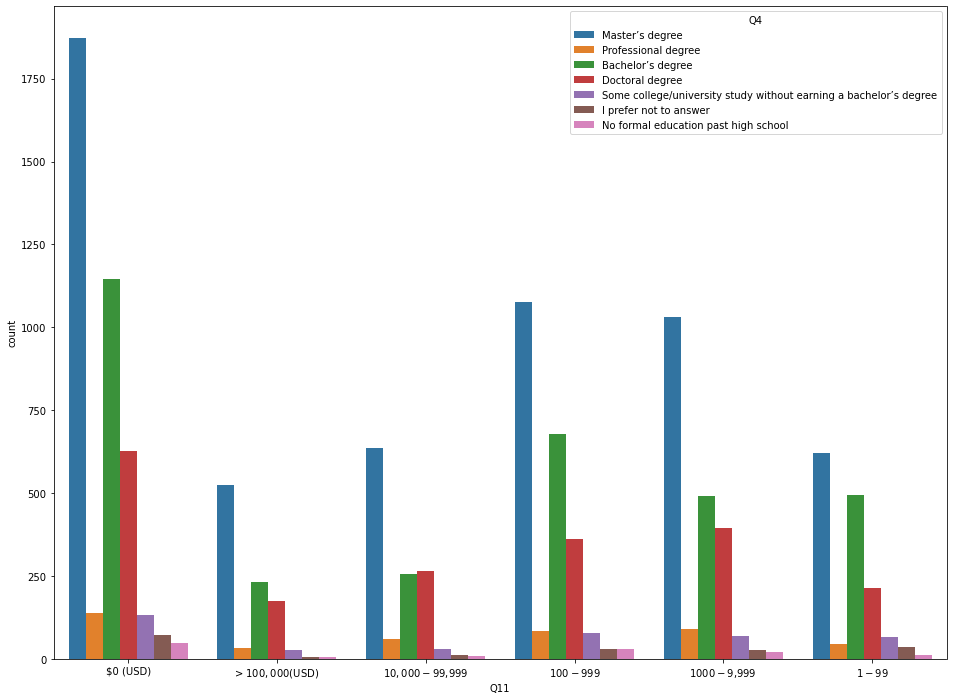

In [46]:
# plot how much money spent on ML with different degrees
plt.figure(figsize=(16, 12))
sns.countplot('Q11', hue='Q4', data=Salary)
Salary['Q11'] = Salary['Q11'].fillna('$0 (USD)')

Notice that almost all people in with different education backgrounds do not spend money on machine learning. So I fill in all missing values in Q11 with '$0 (USD)'.

## Q14 NAs
Q14: What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

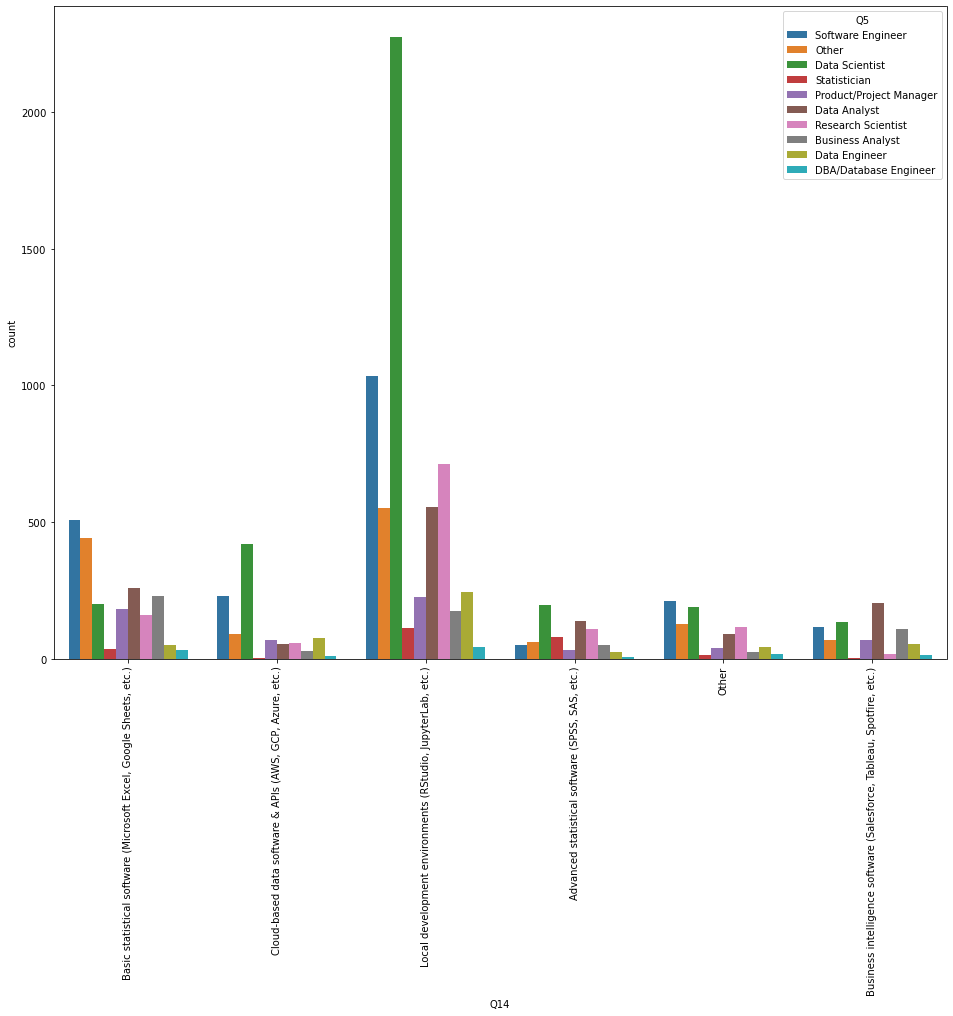

In [47]:
# plot the primary tool used by prople with different jobs
plt.figure(figsize=(16, 12))
sns.countplot('Q14', hue = 'Q5', data = Salary)
plt.xticks(rotation=90)
Salary['Q14'] = Salary['Q14'].fillna('Local development environments (RStudio, JupyterLab, etc.)')

From the plot, almost all people with different work backgrounds use the Local development environments (RStudio, JupyterLab, etc.). So I use this value to fill in the missing values in this variable.

## Q15 NAs
Q15: How long have you been writing code to analyze data (at work or at school)?

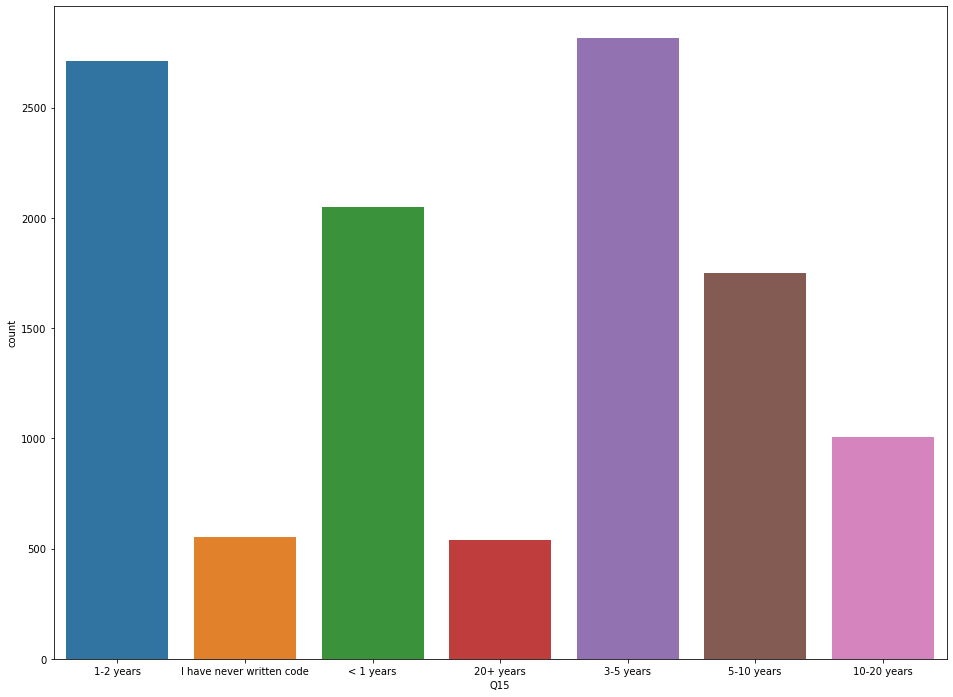

In [48]:
# plot the time that prople use to write code 
plt.figure(figsize=(16, 12))
sns.countplot('Q15', data = Salary)

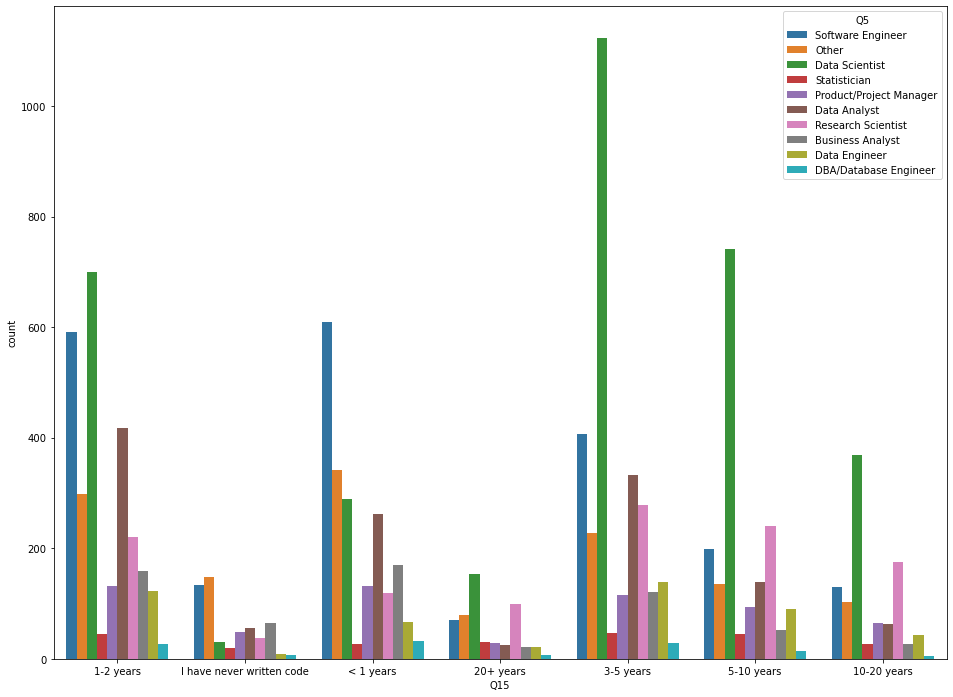

In [49]:
# plot the time that prople use to write code with different jobs
plt.figure(figsize=(16, 12))
sns.countplot('Q15', hue = 'Q5', data = Salary)

In [50]:
def fixNaNCodeExp(exp, job):
    if exp == exp:
        return exp
    if job == 'Software Engineer' or 'Other' or 'Product/Project Manager' or 'Business Analyst':
        return '< 1 years'
    elif job == 'Data Scientist' or 'Statistician' or 'Research Scientist' or 'Data Engineer':
        return '3-5 years'
    else:
        return '1-2 years'
    
Salary['Q15'] = Salary.apply(lambda row: fixNaNCodeExp(row['Q15'],row['Q5']),axis=1)

From the plot, I found that people with different work backgrounds spend different time on coding, then I developed a function to help me fill in the missing values appropriatly.

## Q19 NAs
Q19: What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

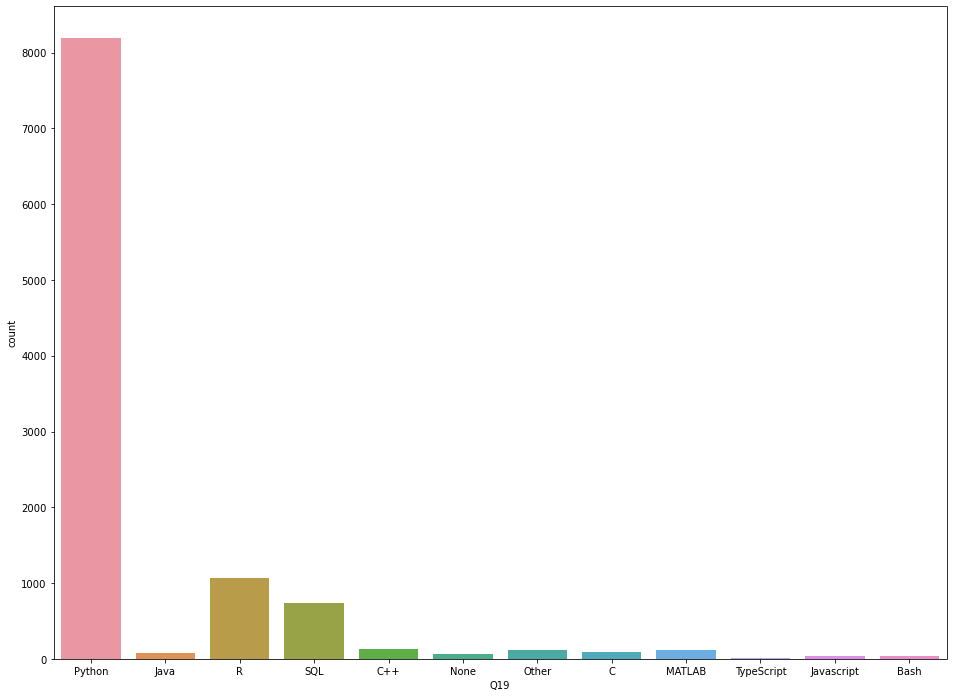

In [51]:
# plot the programming language that prople recommend to learn first
plt.figure(figsize=(16, 12))
sns.countplot('Q19', data = Salary)

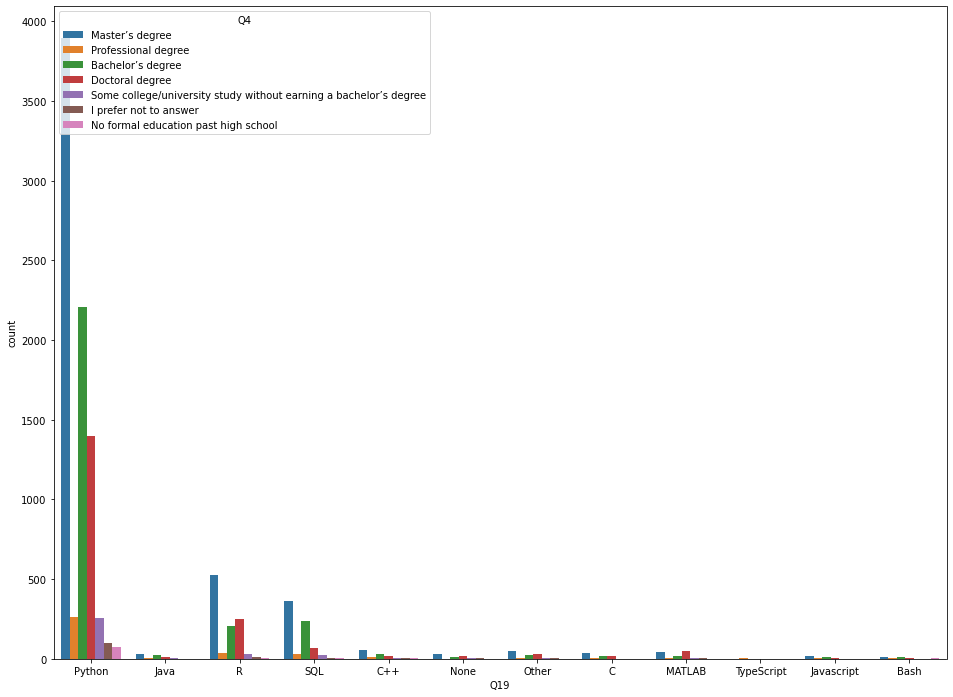

In [52]:
# plot the programming language that prople recommend to learn first with different education backgrounds
plt.figure(figsize=(16, 12))
sns.countplot('Q19', hue = 'Q4', data = Salary)
Salary['Q19'] = Salary['Q19'].fillna('Python')

From the plot, almost all people with different education backgrounds learn Python first. So I use this value to fill in the missing values in this variable.

## Q22 NAs
Q22: Have you ever used a TPU (tensor processing unit)?

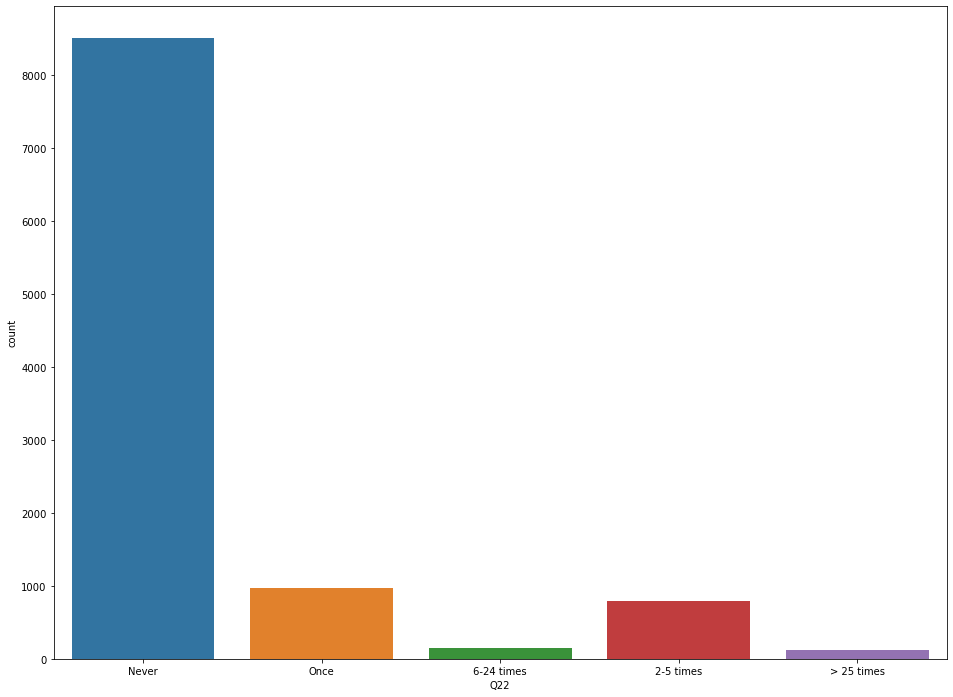

In [53]:
plt.figure(figsize=(16, 12))
sns.countplot('Q22', data = Salary)

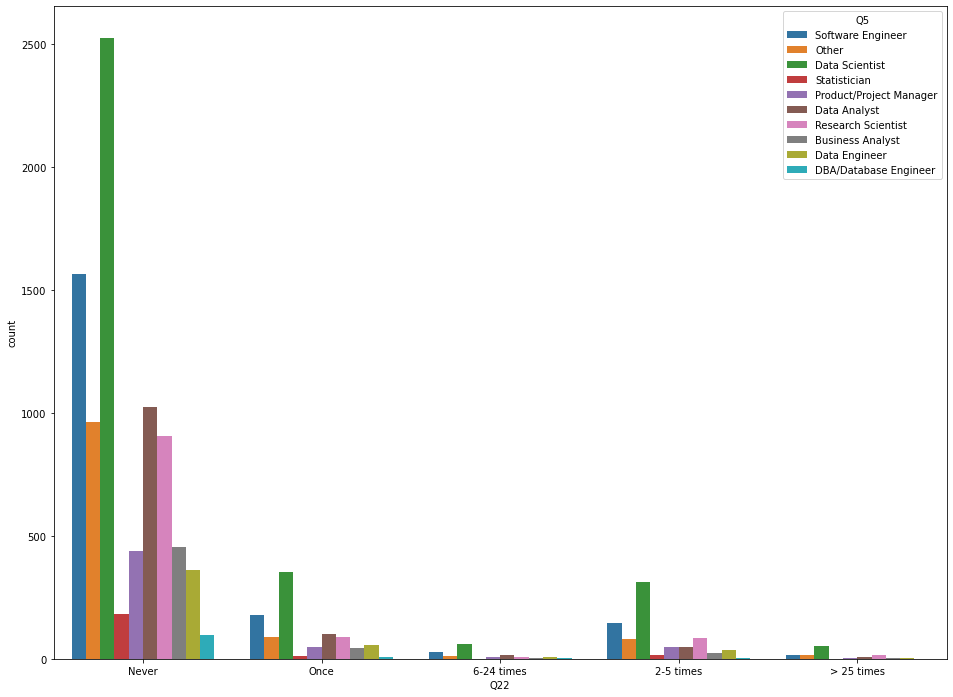

In [54]:
# plot the frenquency that people with different jobs used TPU
plt.figure(figsize=(16, 12))
sns.countplot('Q22', hue = 'Q5', data = Salary)
Salary['Q22'] = Salary['Q22'].fillna('Never')

From the plot, almost all people with different work backgrounds never use TPU. So I use this value to fill in the missing values in this variable.

## Q23 NAs
Q23: For how many years have you used machine learning methods?

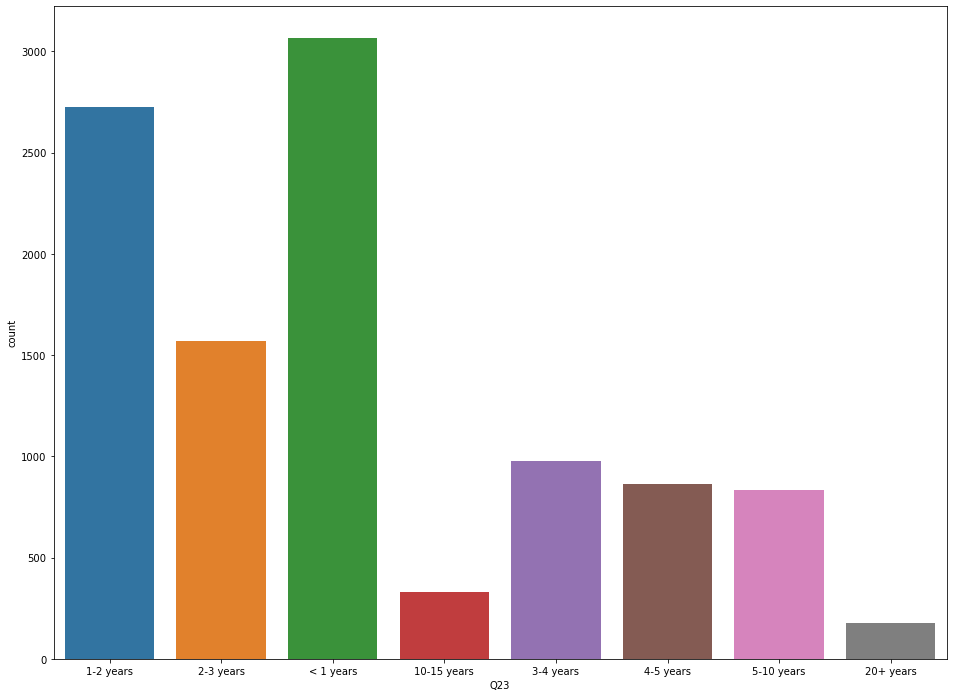

In [55]:
plt.figure(figsize=(16, 12))
sns.countplot('Q23', data = Salary)

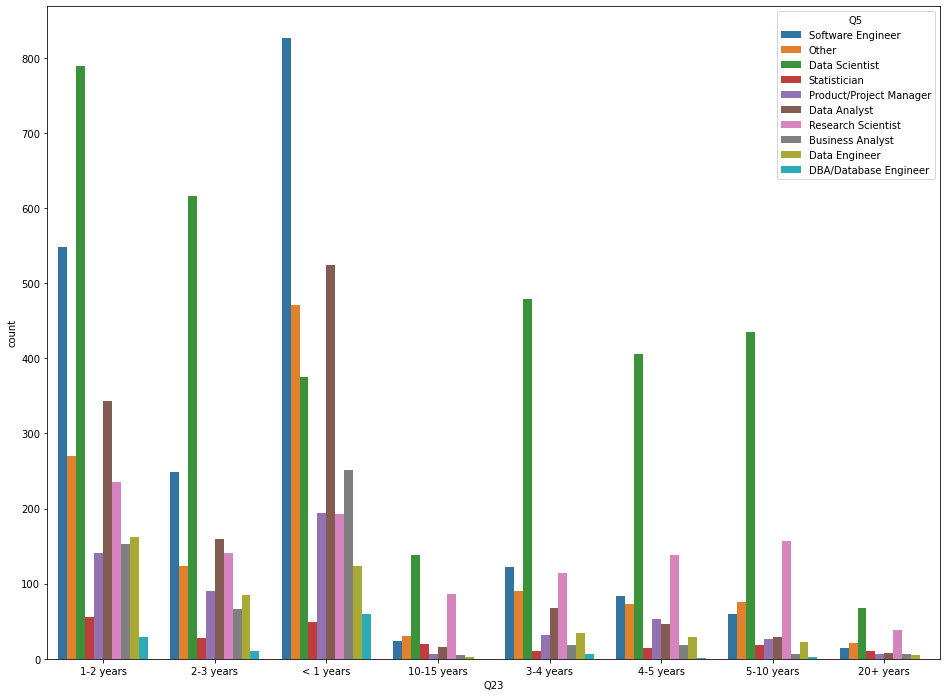

In [56]:
# plot the time that people with different work backgrounds use ML methods
plt.figure(figsize=(16, 12))
sns.countplot('Q23', hue = 'Q5', data = Salary)

In [57]:
def fixNaN_MLExp(exp, job):
    if exp == exp:
        return exp
    if job == 'Software Engineer' or 'Other' or 'Product/Project Manager' or 'Business Analyst' or 'Data Analyst':
        return '< 1 years'
    else:
        return '1-2 years'
    
Salary['Q23'] = Salary.apply(lambda row: fixNaN_MLExp(row['Q23'],row['Q5']),axis=1)

From the plot, I found that people with different work backgrounds spend different time on using ML methods, then I developed a function to help me fill in the missing values appropriatly.

## Drop useless columns
Since our target value is Q10_Encoded or Q10_buckets, the time that people spent on this survey and any column with 'Other Text' do not affect the dependent variable, I drop these columns. Also, I drop Q10 as well because Q10_Encoded generated from this column. 

In [58]:
Salary = Salary.drop(['Time from Start to Finish (seconds)', 'Q10'], axis = 1)

def dropText(df):
    for i in range(len(col_name)-1):
        if 'TEXT' in col_name[i]:
            df = df.drop(col_name[i], axis = 1)
    return df  

Salary = dropText(Salary)

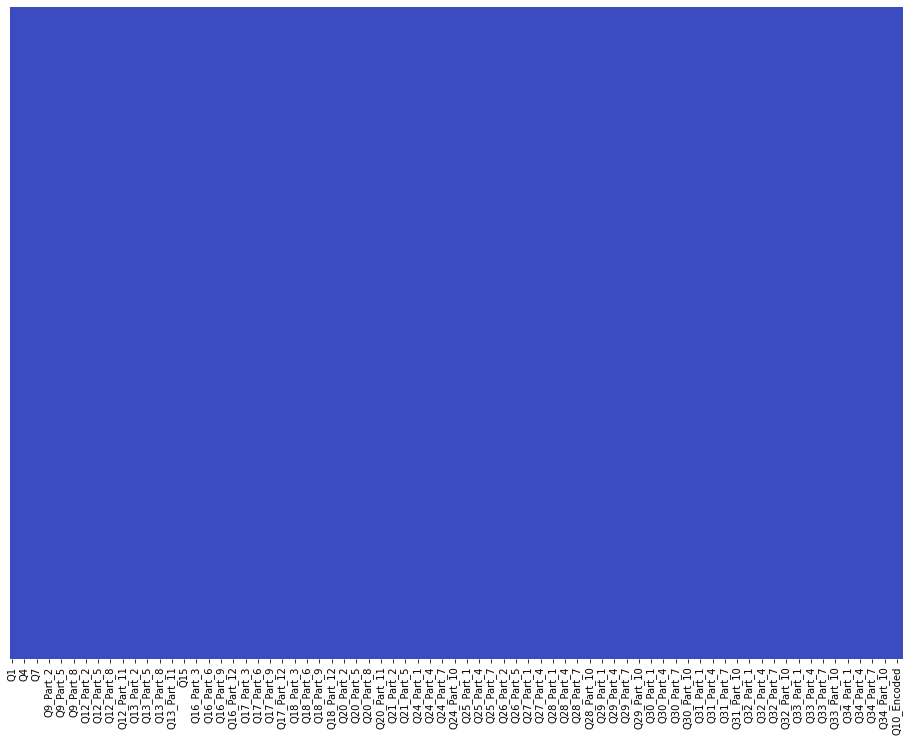

In [59]:
# Check Missing values
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(Salary.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [60]:
cleaned = Salary.copy()
cleaned.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,...,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,No Answer,No Answer,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,3.0,"30,000-39,999"
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,0.0,"0-9,999"
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,No Answer,No Answer,...,No Answer,No Answer,No Answer,No Answer,Azure SQL Database,No Answer,No Answer,No Answer,14.0,">250,000"
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),No Answer,No Answer,...,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,No Answer,0.0,"0-9,999"
5,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",No Answer,No Answer,...,No Answer,No Answer,AWS Relational Database Service,No Answer,No Answer,No Answer,No Answer,No Answer,6.0,"60,000-69,999"


# Part 2: Feature Selection

### Convert Categorical Variables 

In [61]:
def encoding(df):
    name = cleaned.columns.unique()
    for i in range(len(name)-2):
        df = pd.get_dummies(df, columns=[name[i]],prefix=[name[i]],drop_first=True)
    return df

cleaned = encoding(cleaned)
cleaned.head()

,Q10_Encoded,Q10_buckets,Q1_22-24,Q1_25-29,Q1_30-34,Q1_35-39,Q1_40-44,Q1_45-49,Q1_50-54,Q1_55-59,...,Q34_Part_3_SQLite,Q34_Part_4_No Answer,Q34_Part_5_Oracle Database,Q34_Part_6_No Answer,Q34_Part_7_No Answer,Q34_Part_8_No Answer,Q34_Part_9_No Answer,Q34_Part_10_No Answer,Q34_Part_11_None,Q34_Part_12_Other
1,3.0,"30,000-39,999",1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,0,0
2,0.0,"0-9,999",0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,1,1,0,0
3,14.0,">250,000",0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,1,0,0
4,0.0,"0-9,999",1,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,0,0
5,6.0,"60,000-69,999",0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,1,0,0


### Split the data and the labels

In [62]:
# Splot train, test dataset from cleaned dataset 
X = cleaned.drop(['Q10_Encoded','Q10_buckets'],axis=1)
y = cleaned['Q10_Encoded']
output = cleaned[["Q10_buckets", 'Q10_Encoded']]

X_train, X_test, y_train, y_test, o_train, o_test = train_test_split(X, y, output, random_state=47, test_size=0.3)

### Develop Feature Importance

Text(0.5, 0, 'Feature Importances for Total Observations(%)')

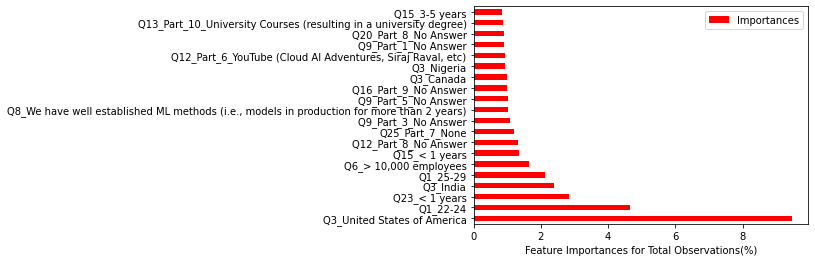

In [63]:
# conduct a decision tree model
DT = DecisionTreeClassifier(max_depth = 12)
DT_model = DT.fit(X_train, y_train)
y_pre = DT_model.predict(X_test)

# plot the importance of features
pd.DataFrame(data = DT_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances for Total Observations(%)")

In [64]:
# Reducing the dimentionality using PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(X_train, X_test)

train_data = pca.transform(X_train)
train_target = y_train
test_data = pca.transform(X_test)
test_target = y_test

# Rescaling values
scaler = StandardScaler()

train_data = scaler.fit_transform(X_train)
test_data = scaler.transform(X_test)

# Part 3: Logistic Regression Model 

In [65]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

### Create and fit a logistic regression model

In [66]:
model = LogisticRegression()    
model.fit(train_data, train_target)

LogisticRegression()

### Validate model: Get accuracy of model on testing set

In [67]:
predictions = model.predict(test_data)

# Conduct precision score on the testing set
ACC = accuracy_score(test_target, predictions)
print ("This model got accuracy score of {}% on the testing set".format(round(ACC*100,2))) 

F1 = f1_score(test_target, predictions, average='weighted')
print ("This model got f1 score of {}% on the testing set".format(round(F1*100,2))) 

This model got accuracy score of 35.15% on the testing set
This model got f1 score of 31.65% on the testing set


In [68]:
o_test['predictions'] = predictions
o_test = o_test.reset_index()
o_test

,index,Q10_buckets,Q10_Encoded,predictions
0,10971,"10,000-19,999",1.0,2.0
1,4404,"0-9,999",0.0,0.0
2,9753,"10,000-19,999",1.0,1.0
3,11373,"0-9,999",0.0,0.0
4,7868,"0-9,999",0.0,2.0
...,...,...,...,...
3745,11899,"0-9,999",0.0,0.0
3746,6102,"10,000-19,999",1.0,0.0
3747,1218,"0-9,999",0.0,0.0
3748,5847,"0-9,999",0.0,0.0


# Part 4: Evaluation (Cross Validation)

In [69]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

buckets_dic = {}
pre_dic = {}
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    o_train, o_test = output.values[train_idx], output.values[test_idx]
    
    pca = PCA(.95)
    pca.fit(X_train, X_test)
    
    train_data = pca.transform(X_train)
    test_data = pca.transform(X_test)
    
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)
    
    model.fit(train_data, y_train)
    
    predictions = model.predict(test_data)
    
    ACC = accuracy_score(y_test, predictions)
    F1 = f1_score(y_test, predictions, average='weighted')
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%, F1-Score: {}%".format(np_idx, round(ACC,3), round(F1,3)))
    buckets_dic[np_idx] = o_test
    pre_dic[np_idx] = predictions

print ("Average Accuracy Score: {}%({}%))".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.298%, F1-Score: 0.25%
Fold 2: Accuracy: 0.33%, F1-Score: 0.275%
Fold 3: Accuracy: 0.323%, F1-Score: 0.271%
Fold 4: Accuracy: 0.308%, F1-Score: 0.26%
Fold 5: Accuracy: 0.319%, F1-Score: 0.271%
Fold 6: Accuracy: 0.356%, F1-Score: 0.303%
Fold 7: Accuracy: 0.337%, F1-Score: 0.271%
Fold 8: Accuracy: 0.39%, F1-Score: 0.311%
Fold 9: Accuracy: 0.426%, F1-Score: 0.353%
Fold 10: Accuracy: 0.418%, F1-Score: 0.337%
Average Accuracy Score: 35.05%(4.329%))


After I conduct the cross validation, I get 10 accuracies for the model. Also I can get the average accuracy, and the standard deviation of the accuracy. Two models are similar because the accuracies are close. And this model is a little bit worse than the previous one. Besides, most of the f1 scores are also lower than the model on the training set and it indicates that this model is less stable than the previous one.

<module 'matplotlib.pyplot' from 'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

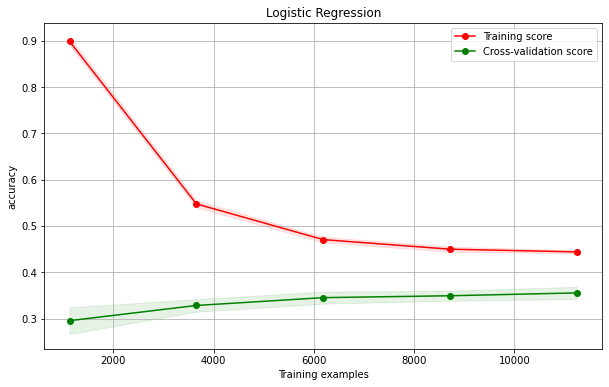

In [70]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

plot_learning_curve(model,'Logistic Regression', X, y, cv=10)

In general, the cross validation model has similar accuracy and standard deviation with cross validation. From the learning curve, as training examples increase, the accuracies of training score keeps decreasing, and that of the Cross-Validation score is increasing. But the cross validation is more stable than the previous one. Therefore, cross validation performs better because it has similar accuracy and lower variance.

In [71]:
df_output = pd.DataFrame(columns=['Q10_buckets', 'Predictions'])
df_output['Q10_buckets'] = list(buckets_dic[9])
df_output['Predictions'] = list(pre_dic[9])
df_output

,Q10_buckets,Predictions
0,"[0-9,999, 0.0]",0.0
1,"[0-9,999, 0.0]",0.0
2,"[10,000-19,999, 1.0]",2.0
3,"[10,000-19,999, 1.0]",1.0
4,"[0-9,999, 0.0]",0.0
...,...,...
1244,"[200,000-249,999, 13.0]",10.0
1245,"[10,000-19,999, 1.0]",0.0
1246,"[0-9,999, 0.0]",0.0
1247,"[0-9,999, 0.0]",0.0


The best one is Fold 9, which has the highest score in 10 folds. Then I take the data from fold 9 and combine them as the output.

# Part 5: Optimize Model

In [35]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
            
            pca = PCA(.95)
            pca.fit(X_train, X_test)
    
            train_data = pca.transform(X_train)
            test_data = pca.transform(X_test)
    
            train_data = scaler.fit_transform(train_data)
            test_data = scaler.transform(test_data)

            model.fit(train_data, y_train)

            predictions = model.predict(test_data)

            ACC = accuracy_score(y_test, predictions)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'newton-cg'}
Best Score: 35.05%(4.332%)

The optimal log model uses C=0.5, and a newton-cg solver, and has a cross validation score of 35.05% with a standard deviation of 4.332%


In general, the optimized model has similar accuracy with the cross validation, but the standard deviation is lower than the previous one, which has lower variance.

<module 'matplotlib.pyplot' from 'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

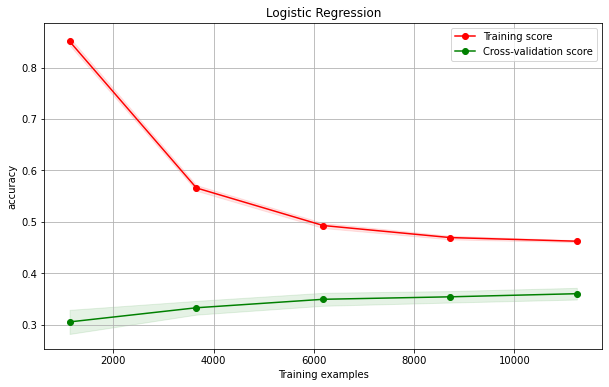

In [36]:
model = LogisticRegression(C=0.5, solver='newton-cg')
plot_learning_curve(model,'Logistic Regression', X, y, cv=10)

In general, the optimized model has similar accuracy and standard deviation with cross validation. From the learning curve, as training examples increase, the accuracies of training score keeps decreasing, and that of the Cross-Validation score is increasing. But the cross validation is more stable than the optimized one Therefore, cross validation performs better because it has similar accuracy and lower variance.